In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [204]:
train_data = pd.read_csv("Data_Train.csv")
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


This dataset contain the details of the Resturant food cost, here cost is the target variable and the rest are independent variables.

In [205]:
train_data.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [206]:
train_data.tail(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12680,QUICK BITES,13798,"North Indian, Fast Food, Desserts",10am – 11pm (Mon-Sun),New Delhi,Near Malviya Nagar,3.4,13 votes,300
12681,CAFÉ,3241,"Beverages, Cafe, Bakery",11am – 11pm (Mon-Sun),Noida,Sector 18,4.1,300 votes,450
12682,QUICK BITES,8085,Fast Food,11am – 11pm (Mon-Sun),Chennai.,Mogappair,3.6,30 votes,450
12683,"QUICK BITES,SWEET SHOP",5430,"North Indian, South Indian, Street Food, Mithai",8:30am – 11pm (Mon-Sun),New Delhi,Pitampura,4.1,1426 votes,500
12684,CASUAL DINING,8324,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Moti Nagar,3.8,492 votes,550
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [207]:
test_data = pd.read_csv("Data_Test.csv")
test_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [208]:
test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [209]:
test_data.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [210]:
print("The Dimensions of the dataset:",train_data.shape)
print("The column headers in the dataset:",train_data.columns)
print("The Dimensions of the dataset:",test_data.shape)
print("The column headers in the dataset:",test_data.columns)

The Dimensions of the dataset: (12690, 9)
The column headers in the dataset: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')
The Dimensions of the dataset: (4231, 8)
The column headers in the dataset: Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


This training Dataset contains 12690 rows and 9 columns. Out of which 1 is the target variable and the remaining 8 are independent variables. And testing data has 4231 rows and 8 columns.

In [211]:
print("Min. Cost :", train_data.COST.min())
print("Max. Cost :", train_data.COST.max())

Min. Cost : 20
Max. Cost : 14000


So, it shows that mini cost is 20 and maxi cost goes upto 14000.

In [212]:
print(train_data.dtypes)
print('\n',test_data.dtypes)

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


In [213]:
# checking 'RATING' and 'VOTES' are treated as strings initially to extract numeric values
train_data['RATING'] = train_data['RATING'].astype(str)
train_data['VOTES'] = train_data['VOTES'].astype(str)

test_data['RATING'] = test_data['RATING'].astype(str)
test_data['VOTES'] = test_data['VOTES'].astype(str)

# Extracting numeric values from 'RATING' and 'VOTES' columns
train_data['RATING'] = pd.to_numeric(train_data['RATING'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
train_data['VOTES'] = pd.to_numeric(train_data['VOTES'].str.extract(r'(\d+)')[0], errors='coerce')

test_data['RATING'] = pd.to_numeric(test_data['RATING'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
test_data['VOTES'] = pd.to_numeric(test_data['VOTES'].str.extract(r'(\d+)')[0], errors='coerce')

In [214]:
# Define categorical features
categorical_features = ['TITLE', 'CUISINES', 'CITY', 'LOCALITY']

# Converting categorical features to string type
train_data[categorical_features] = train_data[categorical_features].astype(str)
test_data[categorical_features] = test_data[categorical_features].astype(str)

In [215]:
# Handling missing values
train_data[categorical_features] = train_data[categorical_features].fillna('missing')
test_data[categorical_features] = test_data[categorical_features].fillna('missing')



In [216]:
#filling missing values if there any
train_data['RATING'] = train_data['RATING'].fillna(train_data['RATING'].mean())
train_data['VOTES'] = train_data['VOTES'].fillna(train_data['VOTES'].mean())
test_data['RATING'] = test_data['RATING'].fillna(test_data['RATING'].mean())
test_data['VOTES'] = test_data['VOTES'].fillna(test_data['VOTES'].mean())

In [217]:
from sklearn.preprocessing import LabelEncoder

# Concatenating training and test data for categorical features
combined_data = pd.concat([train_data[categorical_features], test_data[categorical_features]], axis=0)

# Apply Label Encoding to categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

# Split the data back into training and test sets
train_data[categorical_features] = combined_data.iloc[:len(train_data), :]
test_data[categorical_features] = combined_data.iloc[len(train_data):, :]


print(train_data.head())
print(test_data.head())

   TITLE  RESTAURANT_ID  CUISINES                                    TIME  \
0     34           9438      3294  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)   
1     36          13198       364                    6pm – 11pm (Mon-Sun)   
2     34          10915      3729     11am – 3:30pm, 7pm – 11pm (Mon-Sun)   
3    103           6346      5156                 11:30am – 1am (Mon-Sun)   
4     55          15387      2218                    11am – 1am (Mon-Sun)   

   CITY  LOCALITY  RATING  VOTES  COST  
0   400       328     3.6   49.0  1200  
1    75      1214     4.2   30.0  1500  
2    75      1272     3.8  221.0   800  
3   277       161     4.1   24.0   800  
4   277       709     3.8  165.0   300  
   TITLE  RESTAURANT_ID  CUISINES  \
0     34           4085      3878   
1    103          12680      4879   
2     34           1411      4333   
3    122            204       631   
4    103          13453      4891   

                                                TIME  CITY  LOCALITY

In [218]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  int32  
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  int32  
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  int32  
 5   LOCALITY       12690 non-null  int32  
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int32(4), int64(2), object(1)
memory usage: 694.1+ KB


In [219]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          4231 non-null   int32  
 1   RESTAURANT_ID  4231 non-null   int64  
 2   CUISINES       4231 non-null   int32  
 3   TIME           4231 non-null   object 
 4   CITY           4231 non-null   int32  
 5   LOCALITY       4231 non-null   int32  
 6   RATING         4231 non-null   float64
 7   VOTES          4231 non-null   float64
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 198.5+ KB


In [220]:
train_data.nunique().to_frame("No. of unique values")

,No. of unique values
TITLE,113
RESTAURANT_ID,11892
CUISINES,4155
TIME,2689
CITY,360
LOCALITY,1417
RATING,31
VOTES,1848
COST,86


In [221]:
print("Total Duplicate Rows are", train_data.duplicated().sum())

Total Duplicate Rows are 25


Now we will Scale numerical features such as RATING and VOTES, because rating has only few variables i.e 1 to 5 and votings can be in thousand in numbers, So to make our data consistent with both the variables, we will use standard scaler to correct it.

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform on training data
train_data[['RATING', 'VOTES']] = scaler.fit_transform(train_data[['RATING', 'VOTES']])

# Transform test data
test_data[['RATING', 'VOTES']] = scaler.transform(test_data[['RATING', 'VOTES']])

print(train_data.head())
print(test_data.head())

   TITLE  RESTAURANT_ID  CUISINES                                    TIME  \
0     34           9438      3294  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)   
1     36          13198       364                    6pm – 11pm (Mon-Sun)   
2     34          10915      3729     11am – 3:30pm, 7pm – 11pm (Mon-Sun)   
3    103           6346      5156                 11:30am – 1am (Mon-Sun)   
4     55          15387      2218                    11am – 1am (Mon-Sun)   

   CITY  LOCALITY    RATING     VOTES  COST  
0   400       328 -0.461841 -0.457356  1200  
1    75      1214  1.032372 -0.481055  1500  
2    75      1272  0.036230 -0.242816   800  
3   277       161  0.783336 -0.488539   800  
4   277       709  0.036230 -0.312666   300  
   TITLE  RESTAURANT_ID  CUISINES  \
0     34           4085      3878   
1    103          12680      4879   
2     34           1411      4333   
3    122            204       631   
4    103          13453      4891   

                                      

In [223]:
print(train_data.nunique().to_frame("No. of unique values"))
print('\n',test_data.nunique().to_frame("No. of unique values"))

               No. of unique values
TITLE                           113
RESTAURANT_ID                 11892
CUISINES                       4155
TIME                           2689
CITY                            360
LOCALITY                       1417
RATING                           31
VOTES                          1848
COST                             86

                No. of unique values
TITLE                            86
RESTAURANT_ID                  4127
CUISINES                       1727
TIME                           1183
CITY                            152
LOCALITY                        835
RATING                           30
VOTES                          1137


In [224]:
# Extract opening hour from 'TIME' column using regular expression
train_data['OPENING_HOUR'] = train_data['TIME'].str.extract(r'(\d+)(?:am|pm|midnight|noon)').astype(float)
test_data['OPENING_HOUR'] = test_data['TIME'].str.extract(r'(\d+)(?:am|pm|midnight|noon)').astype(float)

# Display DataFrame after conversion
print(train_data[['TIME', 'OPENING_HOUR']])
print(test_data[['TIME', 'OPENING_HOUR']])

                                                   TIME  OPENING_HOUR
0                11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)          11.0
1                                  6pm – 11pm (Mon-Sun)           6.0
2                   11am – 3:30pm, 7pm – 11pm (Mon-Sun)          11.0
3                               11:30am – 1am (Mon-Sun)          30.0
4                                  11am – 1am (Mon-Sun)          11.0
...                                                 ...           ...
12685  12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...          12.0
12686   12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...          12.0
12687                        12noon – 12:30AM (Mon-Sun)          12.0
12688                           6am – 10:45pm (Mon-Sun)           6.0
12689                          12:30pm – 11pm (Mon-Sun)          30.0

[12690 rows x 2 columns]
                                                   TIME  OPENING_HOUR
0                         12noon – 12midnight (Mon-Sun)         

In [225]:
train_data=train_data.dropna(subset=['OPENING_HOUR'])

In [226]:
test_data = test_data.dropna(subset=['OPENING_HOUR'])

In [227]:
train_data.drop('TIME', axis=1, inplace=True)

In [228]:
test_data.drop('TIME', axis=1, inplace=True)

So no columns has same no. of unique values.

In [229]:
train_data.describe()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,OPENING_HOUR
count,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000
mean,67.015500,7765.863636,2801.922422,177.925795,760.747270,-0.001404,0.001878,644.057902,14.058224
std,37.967099,4502.381400,1512.442957,110.169863,463.236888,1.001520,1.007726,607.343090,8.730745
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.446408,-0.513486,20.000000,1.000000
25%,34.000000,3879.750000,1475.000000,75.000000,389.000000,-0.461841,-0.438958,300.000000,9.000000
50%,64.000000,7748.500000,3034.500000,160.000000,674.000000,0.036230,-0.270257,500.000000,11.000000
75%,103.000000,11684.250000,4061.250000,277.000000,1174.000000,0.534301,0.000000,750.000000,12.000000
max,122.000000,15573.000000,5182.000000,450.000000,1636.000000,2.775620,50.853957,14000.000000,59.000000


There are 12665 observations are present in the dataset. There is slight difference between median(50%) and the mean value, it means there is chances of little skewness.

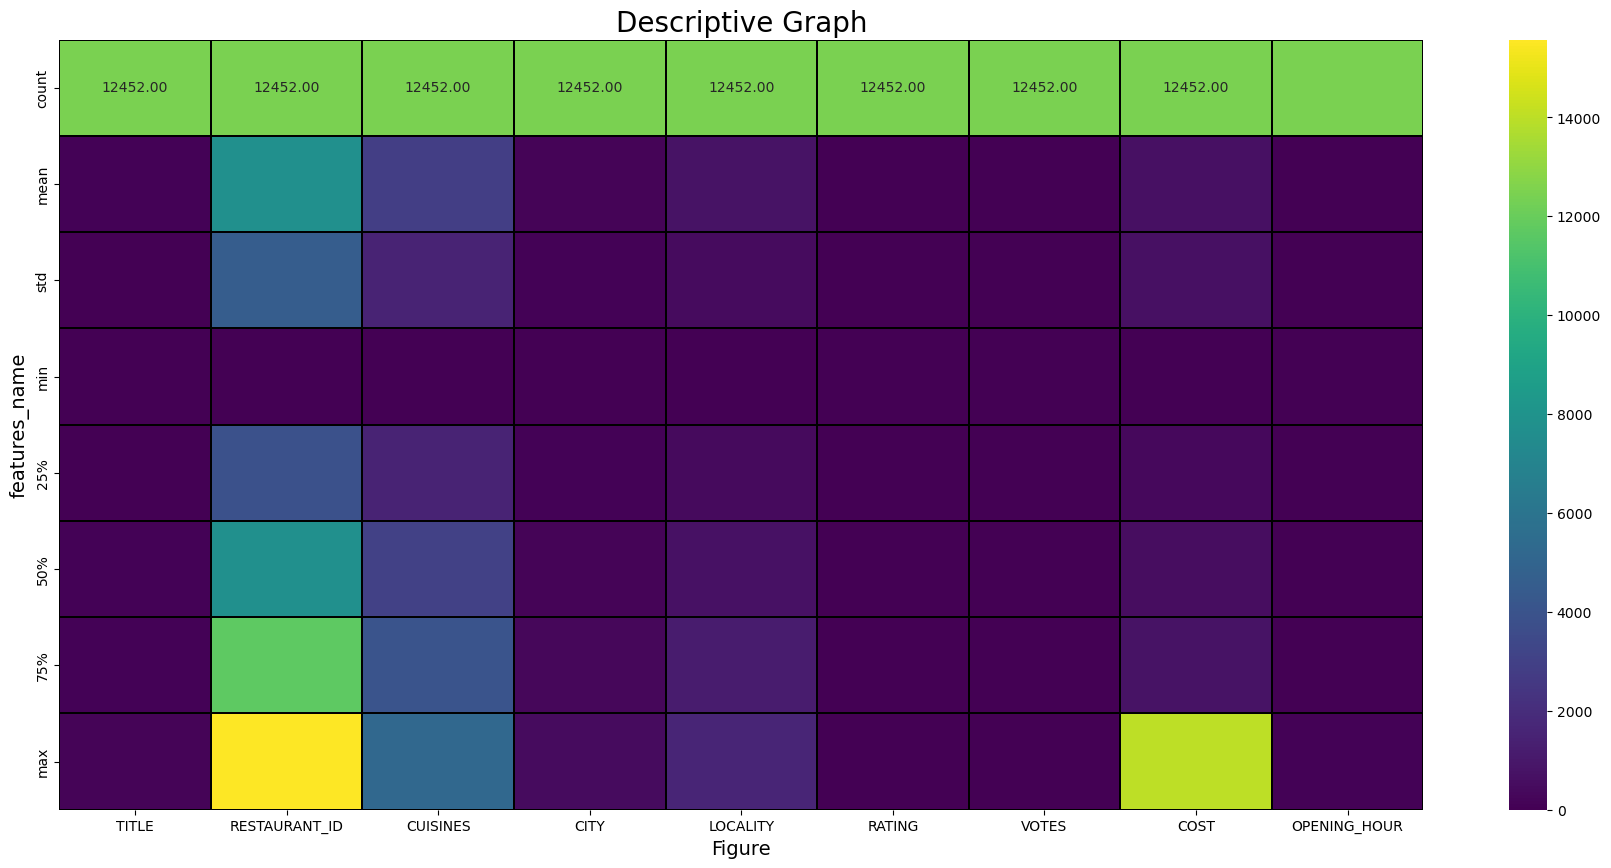

In [230]:
plt.figure(figsize=(22,10))
sns.heatmap(train_data.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black', cmap='viridis')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('features_name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

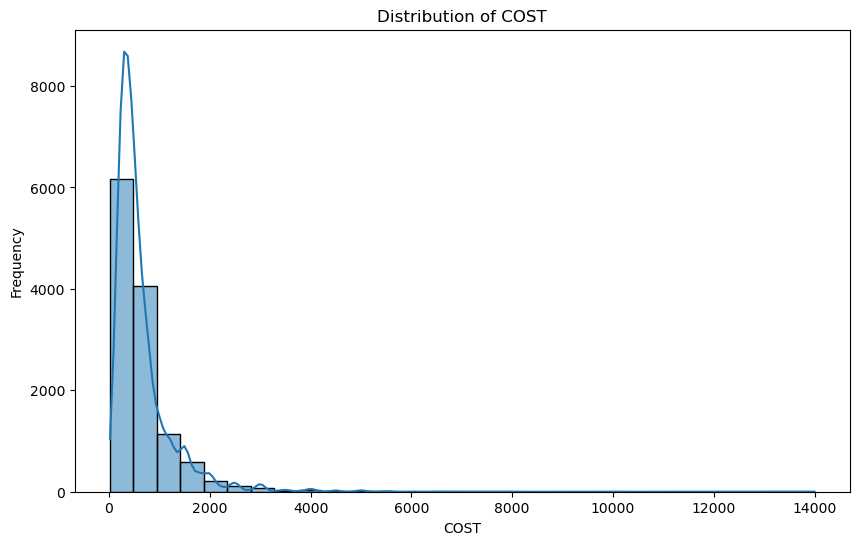

In [231]:
#Distribution of cost
plt.figure(figsize=(10, 6))
sns.histplot(train_data['COST'], bins=30, kde=True)
plt.title('Distribution of COST')
plt.xlabel('COST')
plt.ylabel('Frequency')
plt.show()

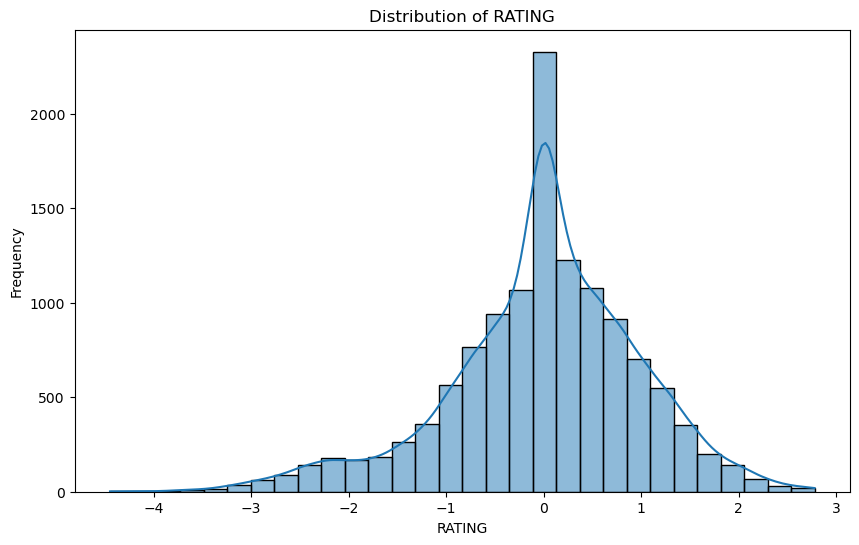

In [232]:
# Distribution of RATING
plt.figure(figsize=(10, 6))
sns.histplot(train_data['RATING'], bins=30, kde=True)
plt.title('Distribution of RATING')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.show()

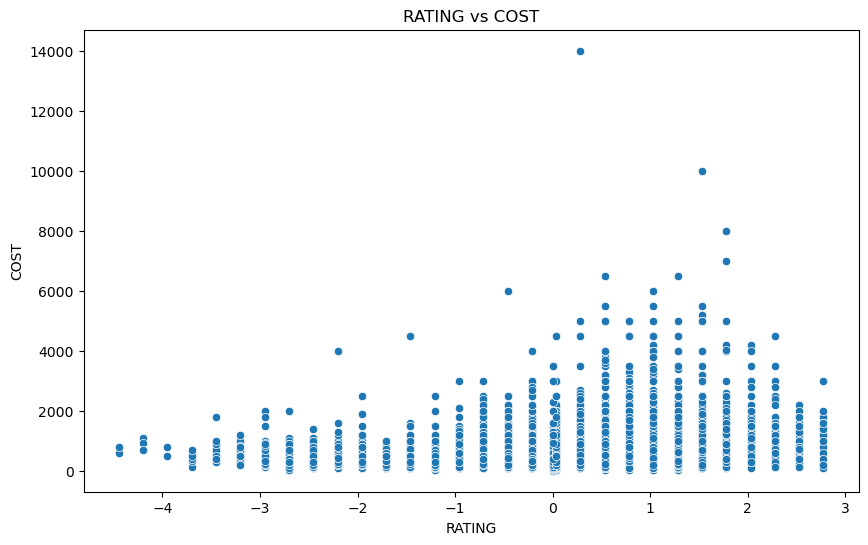

In [233]:
# Scatter plot of RATING vs COST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RATING', y='COST', data=train_data)
plt.title('RATING vs COST')
plt.xlabel('RATING')
plt.ylabel('COST')
plt.show()

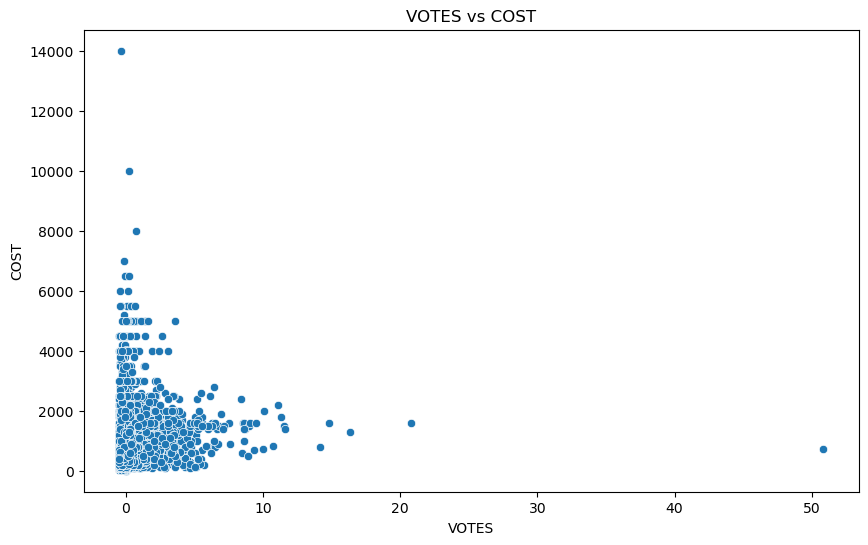

In [234]:
# Scatter plot of VOTES vs COST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VOTES', y='COST', data=train_data)
plt.title('VOTES vs COST')
plt.xlabel('VOTES')
plt.ylabel('COST')
plt.show()

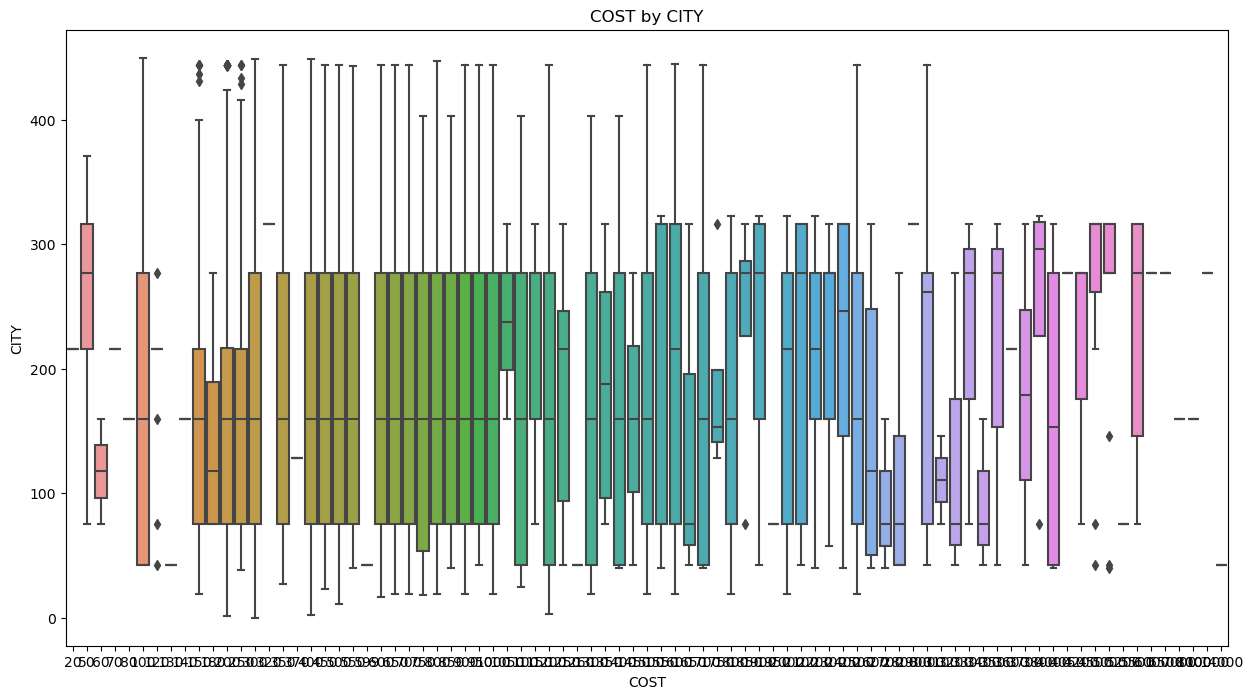

In [235]:
# Box plot of COST by CITY
plt.figure(figsize=(15, 8))
sns.boxplot(x='COST', y='CITY', data=train_data)
plt.title('COST by CITY')
plt.xlabel('COST')
plt.ylabel('CITY')
plt.show()

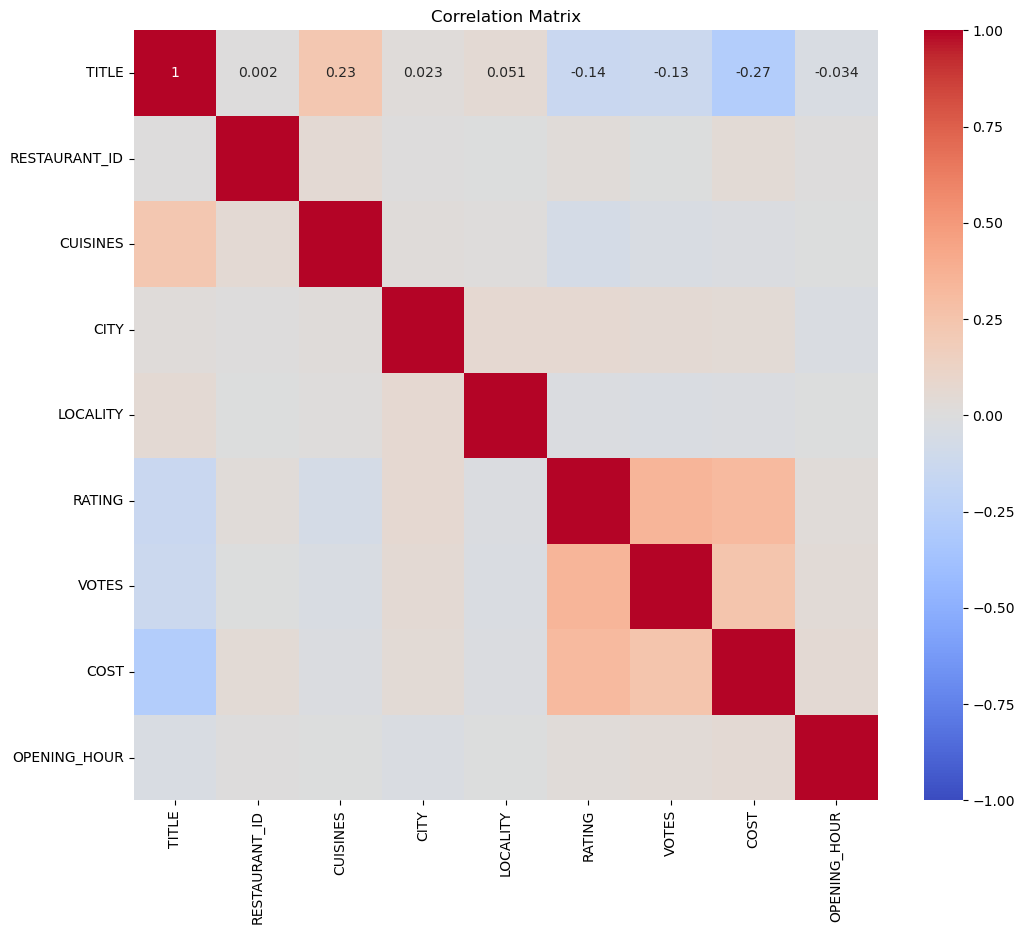

In [236]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

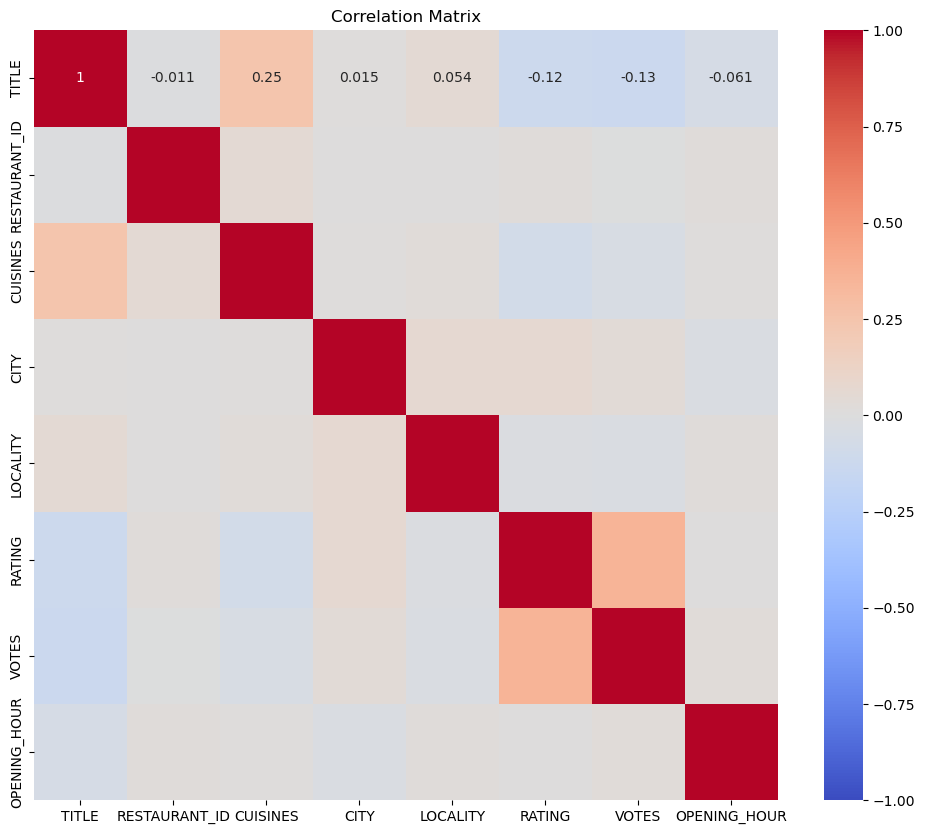

In [237]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
correlation_matrix = test_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

This gives the correlation between the dependent and independent variables.

In [238]:
from scipy.stats import zscore
z = np.abs(zscore(train_data))
z

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,OPENING_HOUR
0,0.869617,0.371404,0.325366,2.015825,0.934219,0.459757,0.455732,0.915404,0.350296
1,0.816937,1.206551,1.611975,0.934284,0.978486,1.032248,0.479250,1.409379,0.923008
2,0.869617,0.699466,0.612992,0.934284,1.103697,0.037578,0.242828,0.256771,0.350296
3,0.947819,0.315371,1.556536,0.899322,1.294740,0.783581,0.486677,0.256771,1.826009
4,0.316484,1.692758,0.386094,0.899322,0.111712,0.037578,0.312146,0.566520,0.350296
...,...,...,...,...,...,...,...,...,...
12685,0.947819,1.213215,0.577948,0.162717,0.789579,0.037578,0.159462,0.237203,0.235754
12686,0.816937,0.426488,0.077971,0.899322,1.301216,1.280916,0.986321,1.903353,0.235754
12687,0.315668,0.747887,0.122272,1.108099,1.699529,0.534913,0.236206,1.080062,0.235754
12688,0.869617,0.362459,1.056662,0.934284,0.087966,0.708424,0.476775,0.401861,0.923008


In [239]:
#putting thrushold = 3 then 99.7% of the data comes under the bell-shaped curve
np.where(z>3)

(array([   66,    82,   104,   157,   184,   194,   205,   289,   300,
          303,   304,   333,   340,   350,   375,   417,   426,   464,
          496,   503,   528,   556,   591,   663,   720,   759,   764,
          785,   828,   841,   844,   861,   886,   902,   922,   955,
          956,   962,   996,  1008,  1022,  1026,  1066,  1120,  1121,
         1135,  1139,  1181,  1229,  1273,  1329,  1330,  1335,  1368,
         1379,  1450,  1453,  1457,  1458,  1501,  1504,  1522,  1569,
         1574,  1596,  1611,  1634,  1657,  1661,  1701,  1726,  1733,
         1747,  1752,  1790,  1802,  1823,  1850,  1856,  1888,  1902,
         1903,  1939,  1945,  2039,  2061,  2071,  2082,  2099,  2113,
         2157,  2173,  2174,  2176,  2215,  2226,  2236,  2238,  2269,
         2272,  2293,  2298,  2304,  2314,  2334,  2422,  2450,  2485,
         2493,  2527,  2565,  2571,  2583,  2642,  2647,  2697,  2733,
         2792,  2839,  2858,  2874,  2893,  2915,  2921,  2925,  2929,
      

In [240]:
#Now we will remove the data above zscore and creating new DF.
df1= train_data[(z<3).all(axis=1)]
print("New Data Frame:",df1.shape)
print("Old Data Frame:",train_data.shape)

New Data Frame: (11860, 9)
Old Data Frame: (12452, 9)


In [241]:
print("Data loss Perc%", ((train_data.shape[0]-df1.shape[0])/train_data.shape[0])*100)

Data loss Perc% 4.754256344362352


In [242]:
train_data=df1

In [243]:
train_data

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,OPENING_HOUR
0,34,9438,3294,400,328,-0.461841,-0.457356,1200,11.0
1,36,13198,364,75,1214,1.032372,-0.481055,1500,6.0
2,34,10915,3729,75,1272,0.036230,-0.242816,800,11.0
3,103,6346,5156,277,161,0.783336,-0.488539,800,30.0
4,55,15387,2218,277,709,0.036230,-0.312666,300,11.0
...,...,...,...,...,...,...,...,...,...
12685,103,13228,3676,160,395,0.036230,0.162566,500,12.0
12686,36,9686,2684,277,158,1.281407,0.995780,1800,12.0
12687,79,11133,2617,300,1548,0.534301,0.239900,1300,12.0
12688,34,6134,4400,75,720,-0.710876,-0.478561,400,6.0


In [244]:
# Seperating the independent variables and atarget variables into x and y
x = train_data.drop("COST", axis= 1 )
y = train_data['COST']

print('Feature Dimension=', x.shape)
print('Label Dimension', y.shape)

Feature Dimension= (11860, 8)
Label Dimension (11860,)


In [245]:
# REGRESSION ALGORITHIMS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

In [246]:
# finding the best random state
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_val)
    acc = r2_score(y_val,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum r score is ', maxAccu,'On random_state ',maxRS)

Maximum r score is  0.3235849745764944 On random_state  23


In [247]:
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=.30, random_state=maxRS)

In [248]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_val)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_val,pred_LR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_val, pred_LR))
print("Mean Squared Error",mean_squared_error(y_val,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_val, pred_LR)))

LinearRegression()
R2_score: 0.3052615415586085
R2_score on training data: 28.093280171774694
Mean Absolute Error: 240.53151759049715
Mean Squared Error 118461.32323497071
Root Mean Squared Error: 344.18210766245636


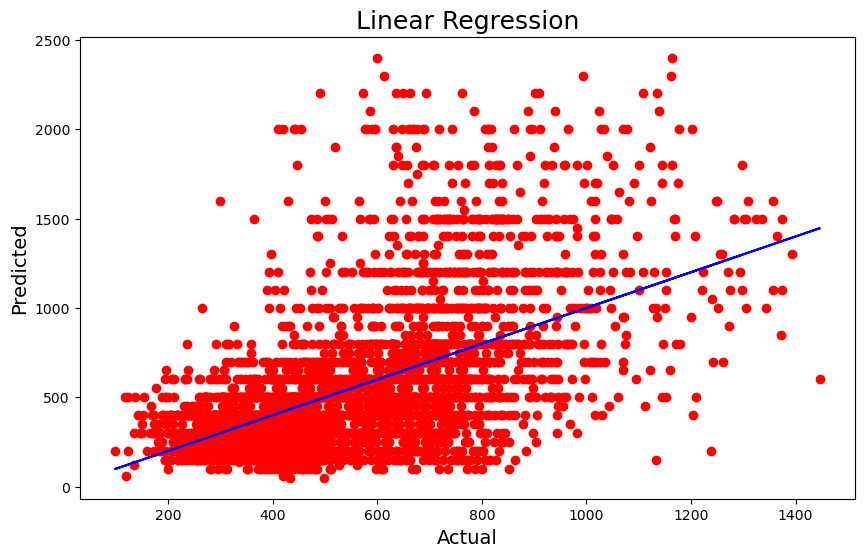

In [249]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_val,color= 'r')
plt.plot(pred_LR, pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [250]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_val)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_val,pred_RFR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_val, pred_RFR))
print("Mean Squared Error",mean_squared_error(y_val,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_val, pred_RFR)))

RandomForestRegressor()
R2_score: 0.687486097825404
R2_score on training data: 95.37617408959098
Mean Absolute Error: 160.0495531197302
Mean Squared Error 53287.406118240586
Root Mean Squared Error: 230.8406509223204


In [251]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_val)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(y_val,pred_GBR))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_val, pred_GBR))
print("Mean Squared Error",mean_squared_error(y_val,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_val, pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.6631068609914557
R2_score on training data: 68.09817603082183
Mean Absolute Error: 167.29566142378644
Mean Squared Error 57444.36132882059
Root Mean Squared Error: 239.67553343806412


In [252]:
Knn=KNN()
Knn.fit(x_train,y_train)
pred_Knn = Knn.predict(x_val)
pred_train = Knn.predict(x_train)
print(Knn)
print('R2_score:',r2_score(y_val,pred_Knn))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_val, pred_Knn))
print("Mean Squared Error",mean_squared_error(y_val,pred_Knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_val, pred_Knn)))

KNeighborsRegressor()
R2_score: -0.004644960472811821
R2_score on training data: 31.990356041287892
Mean Absolute Error: 294.18105677346824
Mean Squared Error 171304.1360427206
Root Mean Squared Error: 413.8890383215296


In [253]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT= DT.predict(x_val)
pred_train = DT.predict(x_train)
print(DT)
print('R2_score:',r2_score(y_val,pred_DT))
print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_val, pred_DT))
print("Mean Squared Error",mean_squared_error(y_val,pred_DT))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_val, pred_DT)))

DecisionTreeRegressor()
R2_score: 0.3846995008099182
R2_score on training data: 100.0
Mean Absolute Error: 220.07307476110174
Mean Squared Error 104916.18887015177
Root Mean Squared Error: 323.90768572257093


In [254]:
from sklearn.model_selection import cross_val_score

In [255]:
score = cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_val,pred_GBR)-score.mean())*100)

[0.66099553 0.65164956 0.6475577  0.62998296 0.65000925]
0.6480390011118365
Difference between R2 score and Cross Validation Score is 1.5067859879619117


In [256]:
score1 = cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_val,pred_RFR)-score.mean())*100)

[0.66099553 0.65164956 0.6475577  0.62998296 0.65000925]
0.6480390011118365
Difference between R2 score and Cross Validation Score is 3.9447096713567498


In [257]:
score2 = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and Cross Validation Score is",(r2_score(y_val,pred_LR)-score.mean())*100)

[0.66099553 0.65164956 0.6475577  0.62998296 0.65000925]
0.6480390011118365
Difference between R2 score and Cross Validation Score is -34.2777459553228


In [259]:
from sklearn.model_selection import  GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],             # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider when looking for the best split
}




# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [260]:
# Use the best model for prediction
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_val)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 158.36773067249865
Mean Squared Error: 52683.046277069356
Root Mean Squared Error: 229.5278769062036
R^2 Score: 0.6910304784969448


In [261]:
import pandas as pd

# Assuming 'train_data' is your training DataFrame and 'test_data' is your test DataFrame

# Ensure 'RESTAURANT_ID' is included in the test data and the order of columns matches the training data
X_test = test_data.copy()

# Predict on test data
test_predictions_food_cost = best_model.predict(X_test)

# Create the output DataFrame with 'RESTAURANT_ID' and predicted 'COST'
output = pd.DataFrame({'RESTAURANT_ID': X_test['RESTAURANT_ID'], 'COST': test_predictions_food_cost})

print(output.head())  # To check the first few rows of the output


   RESTAURANT_ID         COST
0           4085  1143.908694
1          12680   316.219371
2           1411   705.127315
3            204   460.747817
4          13453   306.621306


In [262]:
# Save the predictions
output.to_csv('test_predictions_food_cost.csv', index=False)